In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
import earth_model

## PREM and sesimic wave velocities

P- and S-wave velocities are parameterised in PREM in a similar way to density. For example
$V_P$ can be written:

$$
V_P(r) = \left\{
\begin{array}{ll}
      p_{0,0} + p_{0,1}r + p_{0,2}r^2 + p_{0,3}r^3 & r\leq 1221.5 \; \mathrm{km} \\
      p_{1,0} + p_{1,1}r + p_{1,2}r^2 + p_{1,3}r^3 & 1221.5\leq r\leq 3480.0 \; \mathrm{km}\\
      \vdots & \vdots \\
      p_{12,0} + p_{12,1}r + p_{12,2}r^2 + p_{12,3}r^3 & 6368.0\leq r\leq 6371.0 \; \mathrm{km} \\
\end{array} 
\right.
$$

with $V_S$ written in the same way. However, PREM is both anisotropic (in the upper mantle, for
$6151.0\leq r\leq 6346.6 \; \mathrm{km}$) and anelastic (at all depths). We will ignore the anisotropy
(although adding that may be an interesting thing to do) but we do need to consider anelasticity.

A single value is applied to the bulk, $Q_{\kappa}$ and shear, $Q_{\mu}$, quality factor for each layer. This
is the inverse of the dissipation (e.g. $q_{\kappa} = Q^{-1}_{\kappa}$) and can be used to calculate the
seismic velocities at periods other than 1 s (which is the reference period used in PREM). For a period $T$, 
velocities are given by:

$$V_S(r,T) = V_S(r,1)\left(1-\frac{\ln T}{\pi} q_{\mu}(r)\right)$$

and 

$$V_P(r,T) = V_P(r,1)\left(1-\frac{\ln T}{\pi}\left[
    \left(1 - E\right)q_{\kappa}(r) 
    + Eq_{\mu}(r)\right]\right)$$
    
where $E = \frac{4}{3}\left(\frac{V_S(r,1)}{V_P(r,1)}\right)^2$

In [3]:
# This implements the PREM density model using 

r_earth = 6371 # km

# Note use of isotropic approxmation from footnote in paper
vp_params = np.array([[11.2622,   0.0000, -6.3640,   0.0000],
                      [11.0487,  -4.0362,  4.8023, -13.5732],
                      [15.3891,  -5.3181,  5.5242,  -2.5514],
                      [24.9520, -40.4673, 51.4832, -26.6419],
                      [29.2766, -23.6027,  5.5242,  -2.5514],
                      [19.0957,  -9.8672,  0.0000,   0.0000],
                      [39.7027, -32.6166,  0.0000,   0.0000],
                      [20.3926, -12.2569,  0.0000,   0.0000],
                      [ 4.1875,   3.9382,  0.0000,   0.0000],
                      [ 4.1875,   3.9382,  0.0000,   0.0000],
                      [ 6.8000,   0.0000,  0.0000,   0.0000],
                      [ 5.8000,   0.0000,  0.0000,   0.0000],
                      [ 1.4500,   0.0000,  0.0000,   0.0000]])


vs_params = np.array([[ 3.6678,   0.0000,  -4.4475,  0.0000],
                      [ 0.0000,   0.0000,   0.0000,  0.0000],
                      [ 6.9254,   1.4672,  -2.0834,  0.9783],
                      [11.1671, -13.7818,  17.4575, -9.2777],
                      [22.3459, -17.2473,  -2.0834,  0.9783],
                      [ 9.9839,  -4.9324,   0.0000,  0.0000],
                      [22.3512, -18.5856,   0.0000,  0.0000],
                      [ 8.9496,  -4.4597,   0.0000,  0.0000],
                      [ 2.1519,   2.3481,   0.0000,  0.0000],
                      [ 2.1519,   2.3481,   0.0000,  0.0000],
                      [ 3.9000,   0.0000,   0.0000,  0.0000],
                      [ 3.2000,   0.0000,   0.0000,  0.0000],
                      [ 0.0000,   0.0000,   0.0000,  0.0000]])

q_kappa_params = np.array([1327.7, 57823.0, 57823.0, 57823.0, 57823.0,
                           57823.0, 57823.0, 57823.0, 57823.0, 57823.0,
                           57823.0, 57823.0, 57823.0])

q_mu_params = np.array([84.6, np.inf, 312.0, 312.0, 312.0, 143.0, 143.0,
                        143.0, 80.0, 600.0, 600.0, 600.0, np.inf])
                          
# All 14 discontiuities in PREM in km.
breakpoints = np.array([0.0, 1221.5, 3480.0, 3630.0, 5600.0, 5701.0, 5771.0,
                        5971.0, 6151.0, 6291.0, 6346.6, 6356.0, 6368.0, 6371.0])

# Turn range of polynomials from 0 - 1 to 0 - r_earth
vp_params[:,1] = vp_params[:,1] / r_earth 
vp_params[:,2] = vp_params[:,2] / (r_earth**2)
vp_params[:,3] = vp_params[:,3] / (r_earth**3)
# Turn range of polynomials from 0 - 1 to 0 - r_earth
vs_params[:,1] = vs_params[:,1] / r_earth 
vs_params[:,2] = vs_params[:,2] / (r_earth**2)
vs_params[:,3] = vs_params[:,3] / (r_earth**3)
                       
prem = earth_model.Prem(breakpoints=breakpoints, r_earth=r_earth, vp_params=vp_params,
                        vs_params=vs_params, q_mu_params=q_mu_params,
                        q_kappa_params=q_kappa_params)

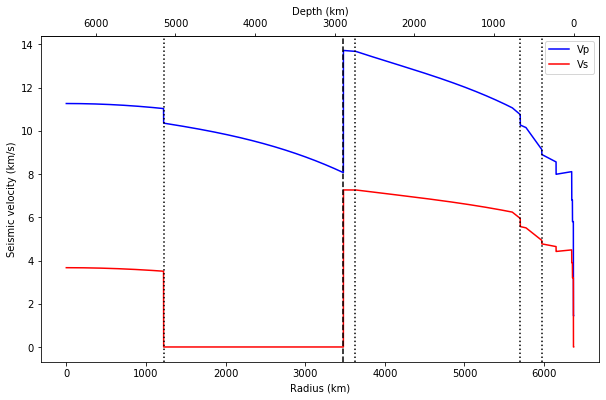

In [4]:
# What does it look like?
fig, ax = plt.subplots(figsize=(10,6))

rs = np.arange(0, 6371, 0.5)
ax.plot(rs, prem.vp(rs), 'b', label='Vp')
ax.plot(rs, prem.vs(rs), 'r', label='Vs')

ax.set_xlabel('Radius (km)')
ax.set_ylabel('Seismic velocity (km/s)')
ax.legend()

ax.axvline(1221.5, ls=':', c='k')
ax.axvline(3480, ls='--', c='k')
ax.axvline(3630, ls=':', c='k')
ax.axvline(5701, ls=':', c='k')
ax.axvline(5971, ls=':', c='k')

secax = ax.secondary_xaxis('top', functions=(lambda x: 6371 - x, lambda x: 6371 - x))
secax.set_xlabel('Depth (km)')

plt.show()

In [5]:
print(prem.vs(1000.0))
print(prem.vs(1000.0, t=10.0))
print(prem.vs(1000.0, t=1000.0))
print(prem.vs(1000.0, t=60*60*24))

3.558227707897195
3.5274008549889566
3.4657471491724787
3.4060505248782986


In [6]:
print(prem.vp(1000.0))
print(prem.vp(1000.0, t=10.0))
print(prem.vp(1000.0, t=1000.0))
print(prem.vp(1000.0, t=60*60*24))

11.10541122721928
11.113289239204116
11.12904526317379
11.14430114164584


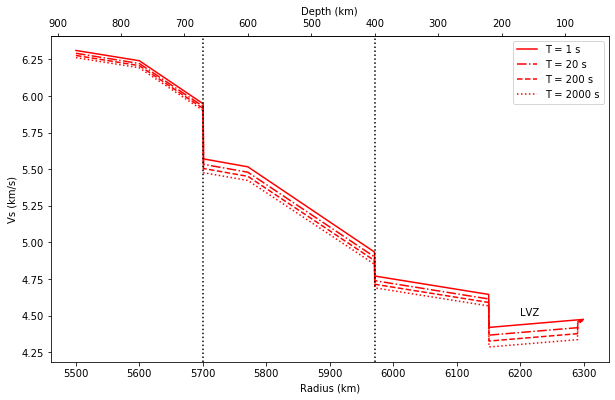

In [7]:
# What does it look like?
fig, ax = plt.subplots(figsize=(10,6))

rs = np.arange(5500, 6300, 0.5)
ax.plot(rs, prem.vs(rs), 'r', label='T = 1 s')
ax.plot(rs, prem.vs(rs, t=20.0), 'r-.', label='T = 20 s')
ax.plot(rs, prem.vs(rs, t=200.0), 'r--', label='T = 200 s')
ax.plot(rs, prem.vs(rs, t=2000.0), 'r:', label='T = 2000 s')
ax.set_xlabel('Radius (km)')
ax.set_ylabel('Vs (km/s)')
ax.legend()

ax.axvline(5701, ls=':', c='k')
ax.axvline(5971, ls=':', c='k')
ax.annotate('LVZ', (6200, 4.5))


secax = ax.secondary_xaxis('top', functions=(lambda x: 6371 - x, lambda x: 6371 - x))
secax.set_xlabel('Depth (km)')

plt.show()